In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
#machine learning algorithms from scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
#load the dataset

df = pd.read_csv('train.csv')

## Summary of dataset

In [3]:
# NUMBER OF ROWS, COLUMNS AND DATATYPE

#rows and columns
rows, cols = df.shape
print("Rows:", rows)
print("Columns:", cols)

#data types for every column
print("\nData types:")
print(df.dtypes)

df.head(3).T 

Rows: 59598
Columns: 24

Data types:
Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object


,0,1,2
Employee ID,8410,64756,30257
Age,31,59,24
Gender,Male,Female,Female
Years at Company,19,4,10
Job Role,Education,Media,Healthcare
Monthly Income,5390,5534,8159
Work-Life Balance,Excellent,Poor,Good
Job Satisfaction,Medium,High,High
Performance Rating,Average,Low,Low
Number of Promotions,2,3,0


In [4]:
# BASIC STATISTICS

df.describe().round(2)

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.00,59598.00,59598.00,59598.00,59598.00,59598.00,59598.00,59598.00
mean,37227.12,38.57,15.75,7302.40,0.83,50.01,1.65,55.76
std,21519.15,12.08,11.25,2151.46,0.99,28.47,1.56,25.41
min,1.00,18.00,1.00,1316.00,0.00,1.00,0.00,2.00
25%,18580.25,28.00,7.00,5658.00,0.00,25.00,0.00,36.00
50%,37209.50,39.00,13.00,7354.00,1.00,50.00,1.00,56.00
75%,55876.75,49.00,23.00,8880.00,2.00,75.00,3.00,76.00
max,74498.00,59.00,51.00,16149.00,4.00,99.00,6.00,128.00


In [5]:
# CATEGORICAL FEATURES

cat_cols = df.select_dtypes(include=["object"]).columns

print("Total categorical columns:", len(cat_cols))
print("-" * 40)
#for each categorical feature, list unique values and their counts
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Total categorical columns: 16
----------------------------------------
Column: Gender
Gender
Male      32739
Female    26859
Name: count, dtype: int64
----------------------------------------
Column: Job Role
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
----------------------------------------
Column: Work-Life Balance
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
----------------------------------------
Column: Job Satisfaction
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
----------------------------------------
Column: Performance Rating
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
----------------------------------------
Column: Overtime
Overtime
No     40148

In [6]:
#a summary of categorical data
#numerical features
display(df.describe(include=['O']))

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598,59598
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,32739,15507,22528,29779,35810,40148,17826,29908,23867,29745,48239,56680,49895,29766,23758,31260


In [7]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

## EDA

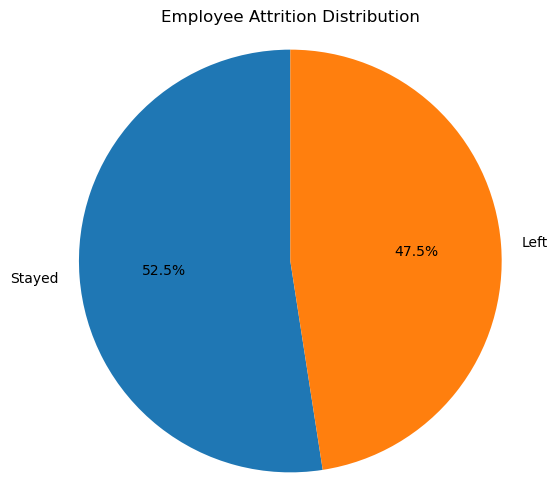

In [15]:
# CountAttrition values
attr_counts = df['Attrition'].value_counts()

# Map values to Stayed/Left
mapping = {'No': 'Stayed', 'Yes': 'Left', 0: 'Stayed', 1: 'Left', False: 'Stayed', True: 'Left'}
labels = [mapping.get(val, str(val)) for val in attr_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    attr_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

<Figure size 600x400 with 0 Axes>

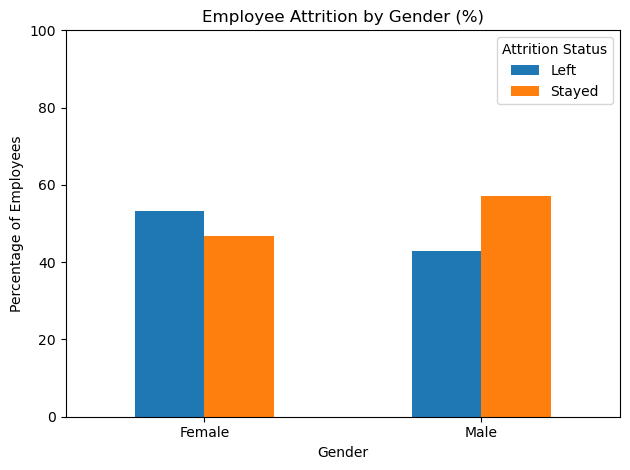

In [16]:
# Gender vs. Attrition
ct_counts = pd.crosstab(df['Gender'], df['Attrition'])
ct_pct = ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6, 4))
ct_pct.plot(kind='bar', rot=0)
plt.title('Employee Attrition by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Employees')
plt.legend(title='Attrition Status', loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

<Figure size 900x400 with 0 Axes>

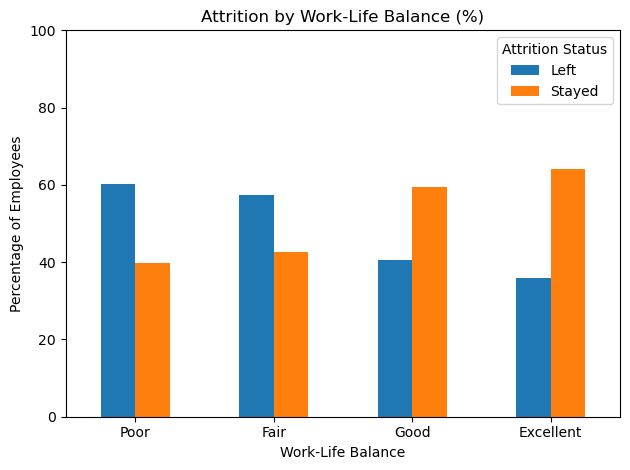

In [18]:
#Work-Life Balance
ct = pd.crosstab(df['Work-Life Balance'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ct_pct = ct_pct.reindex(['Poor','Fair','Good','Excellent'])  # ensure order

plt.figure(figsize=(9, 4))
ct_pct.plot(kind='bar', stacked=False, rot=0)
plt.title('Attrition by Work-Life Balance (%)')
plt.xlabel('Work-Life Balance')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 900x400 with 0 Axes>

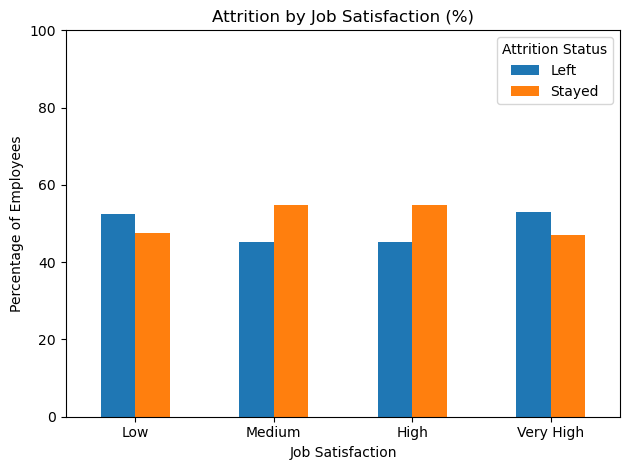

In [19]:
#Job Satisfaction Distribution
ct = pd.crosstab(df['Job Satisfaction'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ct_pct = ct_pct.reindex(['Low','Medium','High','Very High'])  # ensure correct order

plt.figure(figsize=(9, 4))
ct_pct.plot(kind='bar', rot=0)
plt.title('Attrition by Job Satisfaction (%)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

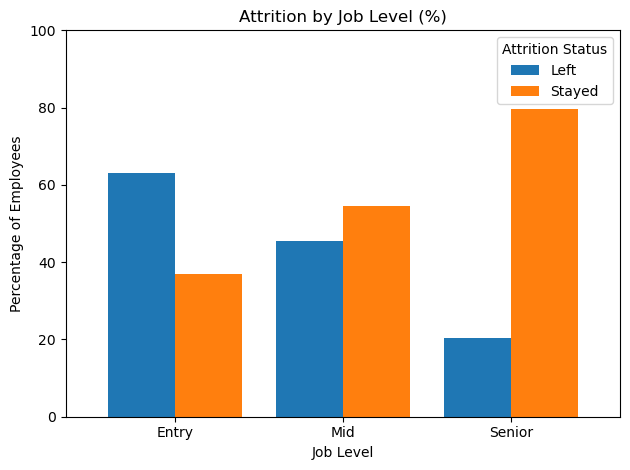

In [20]:
#Job Level vs. Attrition counts
df['AttritionFlag'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})
ct = pd.crosstab(df['Job Level'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
ct_pct.plot(kind='bar', width=0.8, rot=0)
plt.title('Attrition by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

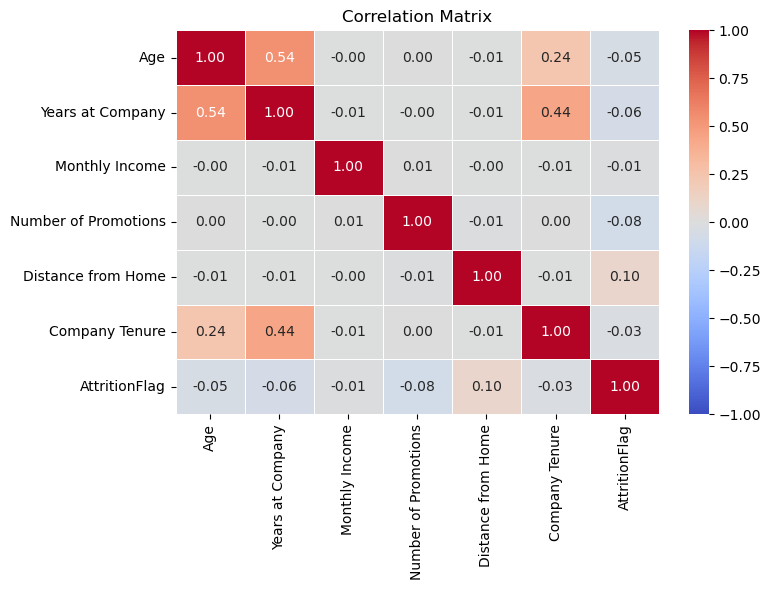

In [23]:
df['AttritionFlag'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})

# Select only the meaningful numeric columns
cols_to_corr = [
    'Age',
    'Years at Company',
    'Monthly Income',
    'Number of Promotions',
    'Distance from Home',
    'Company Tenure',
    'AttritionFlag'
]
numeric_df = df[cols_to_corr]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

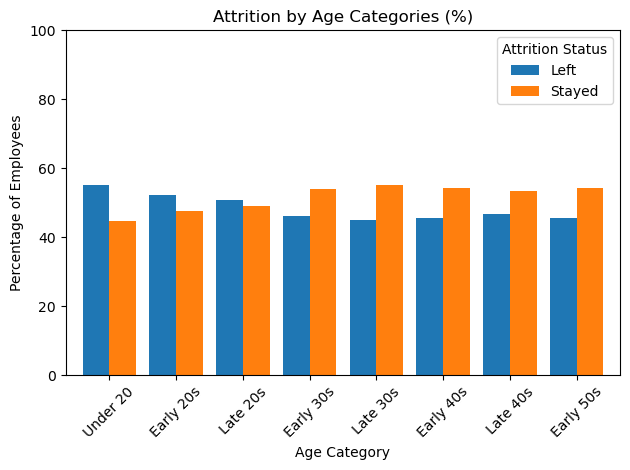

In [22]:
#Age and attrition

# Create age bins with correct labels
age_bins = [18, 20, 25, 30, 35, 40, 45, 50, 55]
age_labels = ['Under 20', 'Early 20s', 'Late 20s', 'Early 30s', 'Late 30s', 'Early 40s', 'Late 40s', 'Early 50s']
df['age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Compute percentage table by age_bin
ct = pd.crosstab(df['age_bin'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot percentages
plt.figure(figsize=(12, 6))
ct_pct.plot(kind='bar', width=0.8, rot=45)
plt.title('Attrition by Age Categories (%)')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

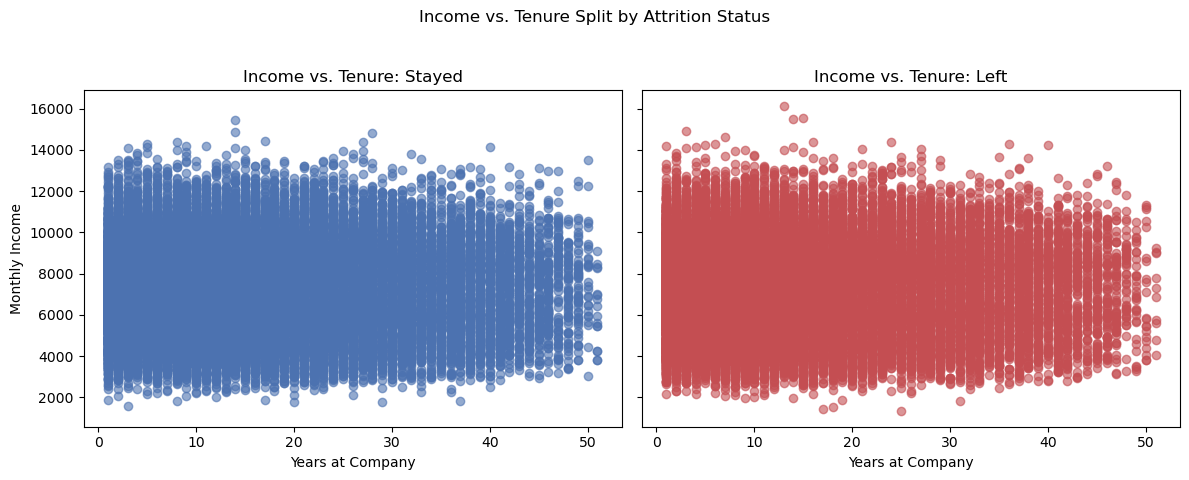

In [24]:
#Years at Company vs. Monthly Income, marker shape by Attrition

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

colors = {'Stayed': '#4C72B0', 'Left': '#C44E52'}

for ax, status in zip(axes, ['Stayed', 'Left']):
    subset = df[df['Attrition'] == status]
    ax.scatter(subset['Years at Company'],
               subset['Monthly Income'],
               alpha=0.6,
               color=colors[status])
    ax.set_title(f'Income vs. Tenure: {status}')
    ax.set_xlabel('Years at Company')
    if ax is axes[0]:
        ax.set_ylabel('Monthly Income')

fig.suptitle('Income vs. Tenure Split by Attrition Status')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 900x400 with 0 Axes>

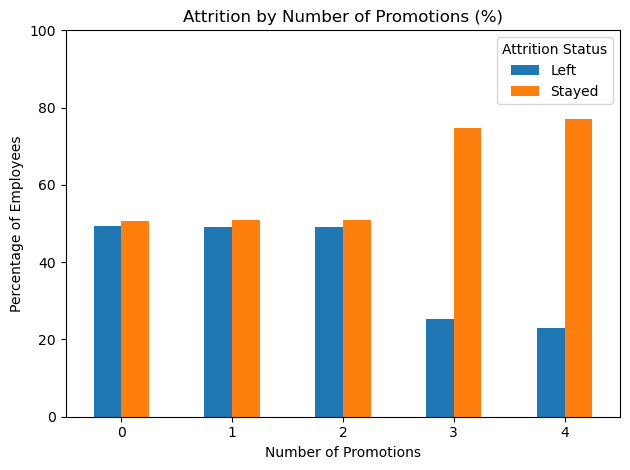

In [25]:
#Number of Promotions
ct = pd.crosstab(df['Number of Promotions'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(9, 4))
ct_pct.plot(kind='bar', rot=0)
plt.title('Attrition by Number of Promotions (%)')
plt.xlabel('Number of Promotions')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

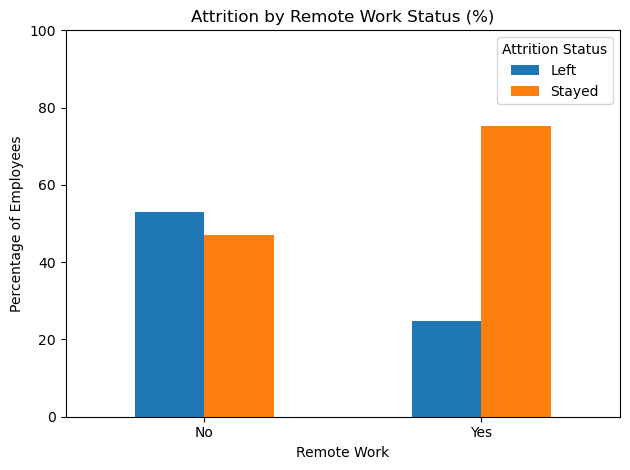

In [26]:
#Remote Work vs. Attrition counts
ct = pd.crosstab(df['Remote Work'], df['Attrition'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(6, 4))
ct_pct.plot(kind='bar', rot=0)
plt.title('Attrition by Remote Work Status (%)')
plt.xlabel('Remote Work')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

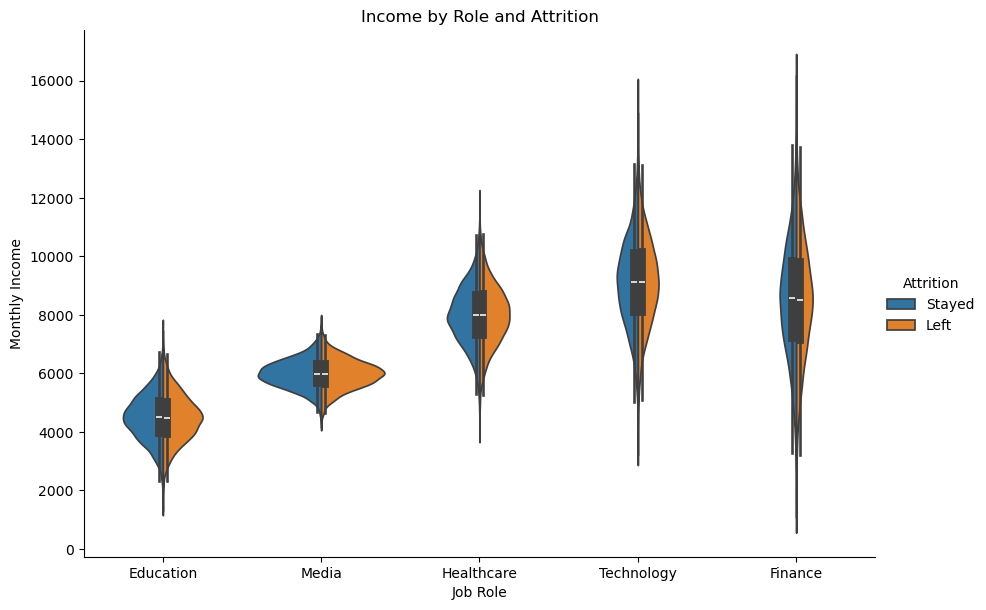

In [27]:
# Income role and attrition
sns.catplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df, kind='violin', split=True, height=6, aspect=1.5)
plt.title('Income by Role and Attrition')
plt.show()

<Figure size 900x400 with 0 Axes>

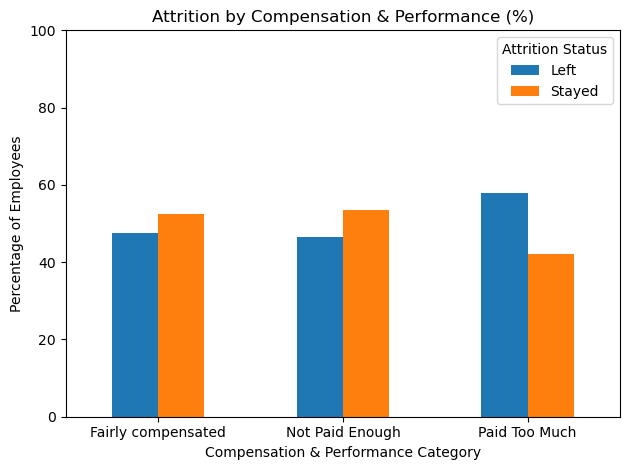

In [28]:
#Compensation and Job Satisfaction

df['PerComp'] = 'Fairly compensated' 

for role in df['Job Role'].unique():
    sub = df[df['Job Role'] == role]
    q1, q3 = sub['Monthly Income'].quantile([0.25, 0.75])
    df.loc[
        (df['Job Role'] == role) & 
        (df['Monthly Income'] <= q1) & 
        (df['Performance Rating'] == 'High'),
        'PerComp'
    ] = 'Not Paid Enough'
    df.loc[
        (df['Job Role'] == role) & 
        (df['Monthly Income'] >= q3) & 
        (df['Performance Rating'] == 'Low'),
        'PerComp'
    ] = 'Paid Too Much'

ct = pd.crosstab(df['PerComp'], df['Attrition'])

ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(9, 4))
ct_pct.plot(kind='bar', rot=0)
plt.title('Attrition by Compensation & Performance (%)')
plt.xlabel('Compensation & Performance Category')
plt.ylabel('Percentage of Employees')
plt.ylim(0, 100)
plt.legend(title='Attrition Status', loc='upper right')
plt.tight_layout()
plt.show()

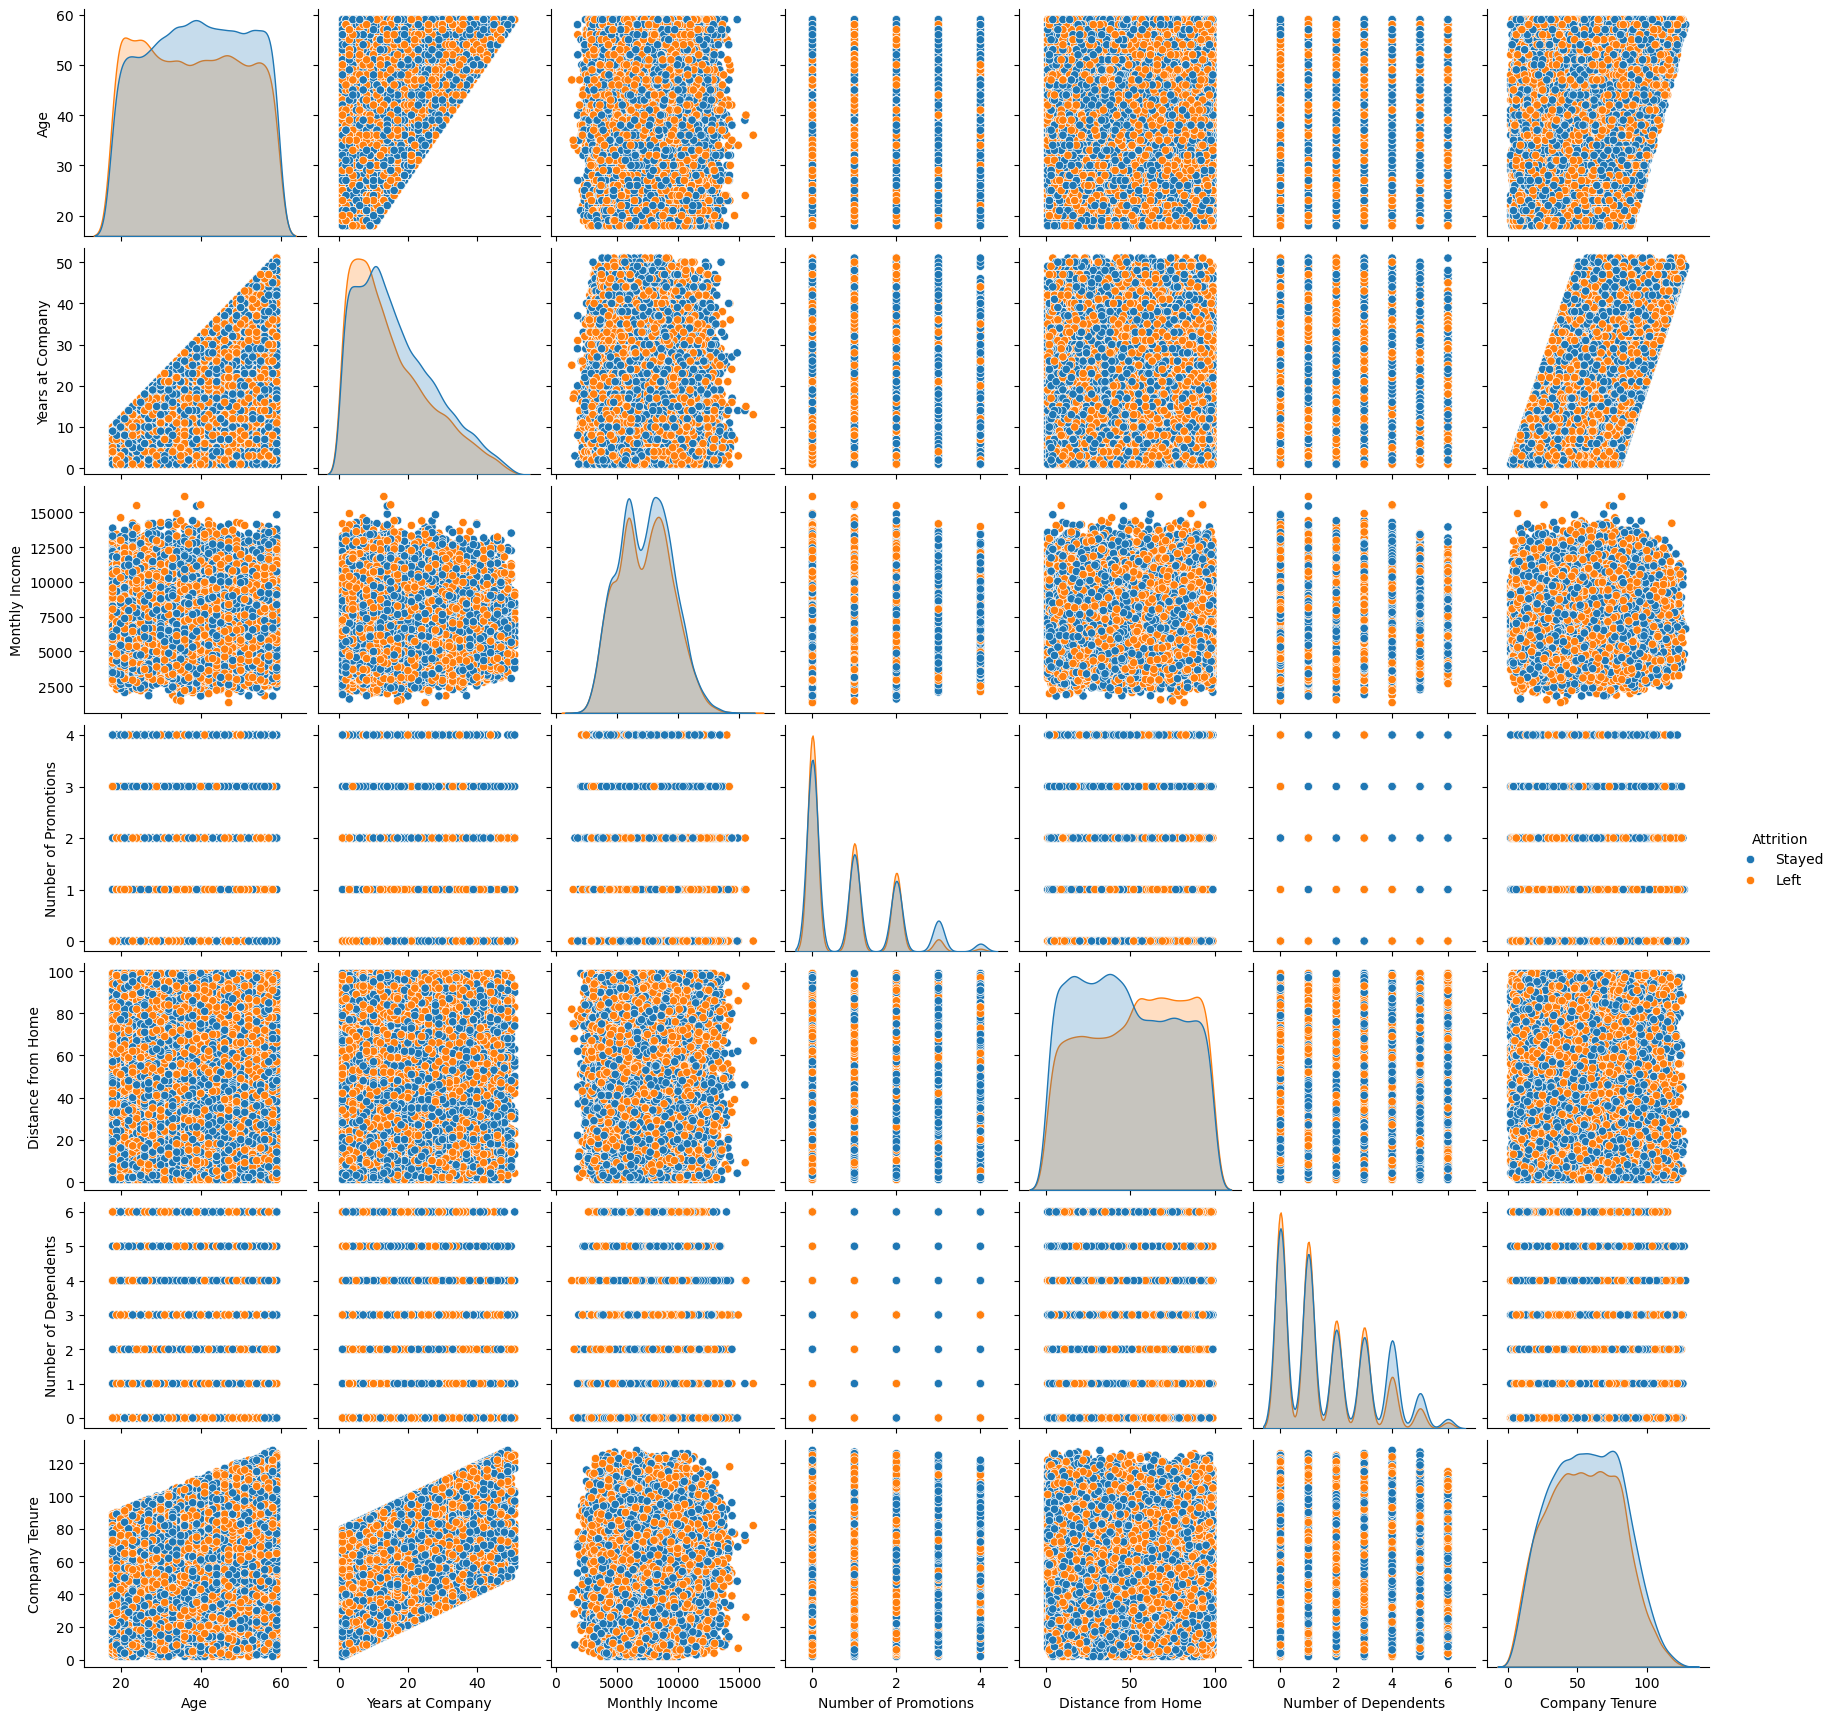

In [331]:
# Visualizing relationships for features
sns.pairplot(data=df, vars=['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home','Number of Dependents','Company Tenure'], hue='Attrition')
plt.show()

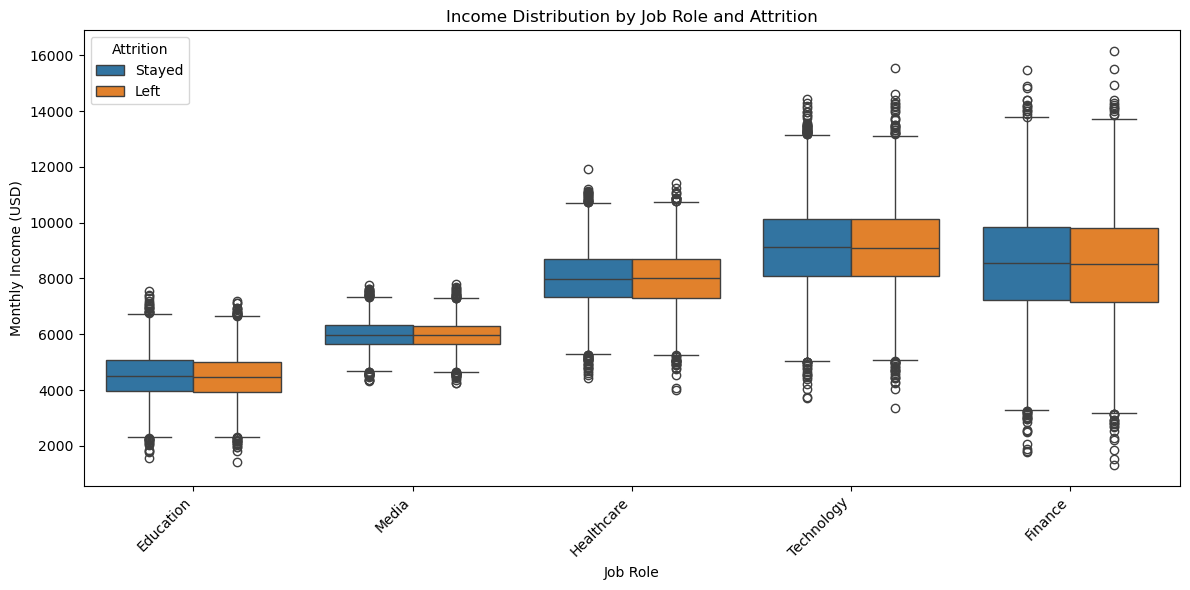

In [29]:
# Inversing the encoding on Attrition column for enhanced interpretation

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Job Role',
    y='Monthly Income',
    hue='Attrition',
    data=df
)
plt.title('Income Distribution by Job Role and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## PRE - PROCESSING , CLEANING , FEATURE ENGINEERING

In [8]:
#Reset data
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

#Missing Value 
print("Train missing values:\n", df_train.isna().sum()[df_train.isna().sum() > 0], "\n")
print("Test missing values:\n", df_test.isna().sum()[df_test.isna().sum() > 0], "\n")


Train missing values:
 Series([], dtype: int64) 

Test missing values:
 Series([], dtype: int64) 



In [9]:
#Drop Identifiers
df_train.drop('Employee ID', axis=1, inplace=True)
df_test .drop('Employee ID', axis=1, inplace=True)

#String Cleanup
#Standardize job role text and balance labels
for col in ['Job Role', 'Work-Life Balance']:
    df_train[col] = df_train[col].str.strip().str.title()
    df_test [col] = df_test [col].str.strip().str.title()

In [10]:
# ===  Ordinal-encode Education Level ===
edu_order = [
    'High School',
    'Associate Degree',
    'Bachelor’s Degree',
    'Master’s Degree',
    'Doctorate'
]

for df in (df_train, df_test):
    df['Education_Num'] = (
        df['Education Level']
          .astype('category')
          .cat.set_categories(edu_order, ordered=True)
          .cat.codes
        + 1  # start codes at 1 instead of 0
    )

# == Define and apply ordinal mappings ===
ordinal_maps = {
    'Work-Life Balance':   {'Poor': 1, 'Good': 2, 'Excellent': 3},
    'Job Satisfaction':    {'Low': 1, 'Medium': 2, 'High': 3},
    'Performance Rating':  {'Low': 1, 'Average': 2, 'High': 3},
    'Company Reputation':  {'Poor': 1, 'Fair': 2, 'Excellent': 3}
}

for col, mapping in ordinal_maps.items():
    for df in (df_train, df_test):
        df[col] = df[col].map(mapping)

# ==. Map Job Level text to numeric ===
joblevel_map = {'Junior': 1, 'Mid': 2, 'Senior': 3}
for df in (df_train, df_test):
    df['Job Level'] = df['Job Level'].map(joblevel_map)



In [11]:
#  Feature engineering
def commute_bin(dist):
    if pd.isna(dist):
        return 'Unknown'
    if dist < 10:
        return 'Short'
    elif dist <= 25:
        return 'Medium'
    else:
        return 'Long'

for df in (df_train, df_test):
    df['Level_Satisfaction']    = df['Job Level'] * df['Job Satisfaction']
    df['Tenure_Ratio']          = df['Years at Company'] / df['Company Tenure']
    df['Engagement_Score']      = df[['Job Satisfaction', 'Work-Life Balance']].mean(axis=1)
    df['Income_Level_Ratio']    = df['Monthly Income'] / df['Job Level']
    df['Commute_Bin']           = df['Distance from Home'].apply(commute_bin)
    df['Overtime_Freq']         = df['Overtime'].map({'Yes': 1, 'No': 0})
    df['High_Performer']        = (df['Performance Rating'] >= 3).astype(int)

#  One-hot encode nominal fields
nominal_cols = [
    'Gender', 'Job Role', 'Marital Status', 'Company Size',
    'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities'
]
df_train = pd.get_dummies(df_train, columns=nominal_cols, drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=nominal_cols, drop_first=True)
df_test  = df_test.reindex(columns=df_train.columns, fill_value=0)

# Display engineered features
print(df_train[[
    'Education_Num', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Company Reputation', 'Job Level',
    'Level_Satisfaction', 'Tenure_Ratio', 'Engagement_Score',
    'Income_Level_Ratio', 'Commute_Bin', 'Overtime_Freq',
    'High_Performer'
]].head())

   Education_Num  Work-Life Balance  Job Satisfaction  Performance Rating  \
0              2                3.0               2.0                 2.0   
1              4                1.0               3.0                 1.0   
2              3                2.0               3.0                 1.0   
3              1                2.0               3.0                 3.0   
4              1                NaN               NaN                 2.0   

   Company Reputation  Job Level  Level_Satisfaction  Tenure_Ratio  \
0                 3.0        2.0                 4.0      0.213483   
1                 2.0        2.0                 6.0      0.190476   
2                 1.0        2.0                 6.0      0.135135   
3                 NaN        2.0                 6.0      0.140000   
4                 2.0        3.0                 NaN      0.602941   

   Engagement_Score  Income_Level_Ratio Commute_Bin  Overtime_Freq  \
0               2.5              2695.0      M

In [12]:
#Cap 'Monthly Income' at the 99th percentile
cap_99 = df['Monthly Income'].quantile(0.99)
df['MonthlyIncome_Capped'] = df['Monthly Income'].clip(upper=cap_99)

#Log-transform 'Monthly Income' (capped) and 'Distance from Home'
df['MonthlyIncome_Log'] = np.log1p(df['MonthlyIncome_Capped'])
df['DistanceFromHome_Log'] = np.log1p(df['Distance from Home'])

#Bin 'Age' into discrete intervals
age_bins = [19, 30, 40, 50, df['Age'].max()]
age_labels = ['20-30', '31-40', '41-50', '50+']
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [13]:
#Extract Target & Drop

y_train = df_train['Attrition'].map({'Stayed': 0, 'Left': 1})
y_test  = df_test ['Attrition'].map({'Stayed': 0, 'Left': 1})
df_train.drop('Attrition', axis=1, inplace=True)
df_test .drop('Attrition', axis=1, inplace=True)